# Robustness
In this example we analyze how robust feature selection with BINN is. All feature selection methods are data-greedy, meaning that we need many samples to generate robust estimations of feature importance. One way to analyze this is to train and explain several models, and compare their feature importances. This will also yield a more robust method.

In [22]:
from binn import BINN, BINNDataLoader, BINNTrainer
import pandas as pd

# Load your data
data_matrix = pd.read_csv("../data/test_qm.csv")
design_matrix = pd.read_csv("../data/design_matrix.tsv", sep="\t")

# Initialize BINN
binn = BINN(data_matrix=data_matrix, network_source="reactome", n_layers=4, dropout=0.2)

## Initialize DataLoader
binn_dataloader = BINNDataLoader(binn)

# Create DataLoaders
dataloaders = binn_dataloader.create_dataloaders(
    data_matrix=data_matrix,
    design_matrix=design_matrix,
    feature_column="Protein",
    group_column="group",
    sample_column="sample",
    batch_size=32,
    validation_split=0.2,
)
# Train the model
trainer = BINNTrainer(binn)

from binn import BINNExplainer

explainer = BINNExplainer(binn)

average_importances = explainer.explain_average(dataloaders, nr_iterations=20, num_epochs=1000, trainer=trainer)


[INFO] BINN is on device: cpu
Mapping group labels: {np.int64(1): 0, np.int64(2): 1}
[BINNExplainer] Iteration 1/20...
[Epoch 1/1000] Train Loss: 0.8831, Train Accuracy: 0.4659
[Epoch 1/1000] Val Loss: 0.6931, Val Accuracy: 0.5312
[Epoch 2/1000] Train Loss: 0.8378, Train Accuracy: 0.5065
[Epoch 2/1000] Val Loss: 0.6930, Val Accuracy: 0.5312
[Epoch 3/1000] Train Loss: 0.8772, Train Accuracy: 0.4972
[Epoch 3/1000] Val Loss: 0.6926, Val Accuracy: 0.5312
[Epoch 4/1000] Train Loss: 0.8827, Train Accuracy: 0.4791
[Epoch 4/1000] Val Loss: 0.6922, Val Accuracy: 0.5312
[Epoch 5/1000] Train Loss: 0.7728, Train Accuracy: 0.5110
[Epoch 5/1000] Val Loss: 0.6915, Val Accuracy: 0.5312
[Epoch 6/1000] Train Loss: 0.7950, Train Accuracy: 0.5028
[Epoch 6/1000] Val Loss: 0.6903, Val Accuracy: 0.5312
[Epoch 7/1000] Train Loss: 0.7194, Train Accuracy: 0.5610
[Epoch 7/1000] Val Loss: 0.6879, Val Accuracy: 0.5312
[Epoch 8/1000] Train Loss: 0.6974, Train Accuracy: 0.6297
[Epoch 8/1000] Val Loss: 0.6827, Val A

In [23]:
average_importances["copy"] = average_importances.apply(lambda x: True if x["source_node"] == x["target_node"] else False, axis=1)
average_importances = average_importances[average_importances["copy"] == False]
average_importances

,source_layer,target_layer,source_node,target_node,class_idx,importance,importance_0,importance_1,importance_2,importance_3,...,importance_13,importance_14,importance_15,importance_16,importance_17,importance_18,importance_19,importance_mean,importance_std,copy
0,0,1,A0M8Q6,R-HSA-166663,0,0.064182,0.074242,0.084723,0.055913,0.040573,...,0.063940,0.084093,0.061968,0.085550,0.105180,0.091364,0.038258,0.064182,0.027423,False
1,0,1,A0M8Q6,R-HSA-166663,1,0.066056,0.043824,0.096369,0.068982,0.045789,...,0.123020,0.018565,0.089859,0.084434,0.072145,0.055199,0.096931,0.066056,0.031259,False
2,0,1,A0M8Q6,R-HSA-198933,0,0.064182,0.074242,0.084723,0.055913,0.040573,...,0.063940,0.084093,0.061968,0.085550,0.105180,0.091364,0.038258,0.064182,0.027423,False
3,0,1,A0M8Q6,R-HSA-198933,1,0.066056,0.043824,0.096369,0.068982,0.045789,...,0.123020,0.018565,0.089859,0.084434,0.072145,0.055199,0.096931,0.066056,0.031259,False
4,0,1,A0M8Q6,R-HSA-2029481,0,0.064182,0.074242,0.084723,0.055913,0.040573,...,0.063940,0.084093,0.061968,0.085550,0.105180,0.091364,0.038258,0.064182,0.027423,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7079,4,5,R-HSA-9612973,output_node,1,0.211170,0.279616,0.201887,0.229716,0.161330,...,0.126964,0.035100,0.284846,0.422363,0.256280,0.011744,0.118671,0.211170,0.140204,False
7080,4,5,R-HSA-9709957,output_node,0,0.214334,0.110395,0.168622,0.055028,0.127895,...,0.039305,0.369611,0.265918,0.303820,0.309318,0.227998,0.198102,0.214334,0.110061,False
7081,4,5,R-HSA-9709957,output_node,1,0.203236,0.372820,0.233183,0.360067,0.365530,...,0.348722,0.021477,0.093267,0.221197,0.065363,0.224730,0.162464,0.203236,0.134925,False
7082,4,5,R-HSA-9748784,output_node,0,0.137426,0.040316,0.019582,0.043490,0.151753,...,0.150279,0.049969,0.001082,0.165931,0.106676,0.313997,0.144867,0.137426,0.087021,False


In [24]:
importance_df_copy = average_importances.groupby(["source_node", "source_layer", "target_layer"], as_index=False).mean(numeric_only=True)
mean_ranks = []
std_ranks = []
source_layer = []
sources = []
for layer in range(binn.n_layers):
    layer_df = importance_df_copy[importance_df_copy["source_layer"] == layer].copy()
    for i in range(10):
        layer_df.sort_values(f"importance_{i}", ascending=False, inplace=True)
        layer_df[f"rank_{i}"] = range(len(layer_df.index))
    rank_cols = [c for c in layer_df.columns if c.startswith("rank")]
    mean_ranks += (layer_df[rank_cols].mean(axis=1)/ len(layer_df.index)).tolist()
    sources += layer_df["source_node"].tolist()
    std_ranks  += (layer_df[rank_cols].std(axis=1)/ len(layer_df.index)).tolist()
    source_layer += layer_df["source_layer"].tolist()
plot_df = pd.DataFrame({"mean":mean_ranks, "std":std_ranks, "source layer":source_layer, "source":sources})

In [25]:
plot_df.sort_values("mean").head(20)

,mean,std,source layer,source
0,0.000446,0.000941,0,P60709
449,0.000937,0.001510,1,R-HSA-975634
1,0.002679,0.002051,0,Q96A08
448,0.004063,0.002965,1,R-HSA-140534
451,0.005625,0.003548,1,R-HSA-114608
768,0.007554,0.007284,2,R-HSA-212436
772,0.008273,0.006356,2,R-HSA-975634
769,0.008633,0.008168,2,R-HSA-5357769
771,0.009353,0.008512,2,R-HSA-76005
2,0.009375,0.005934,0,P04908


If we now plot the (normalized) mean and standard deviation of the rank, we see that highly important features generally have a low standard deviation. We can therefore be the most certain about the most important features.

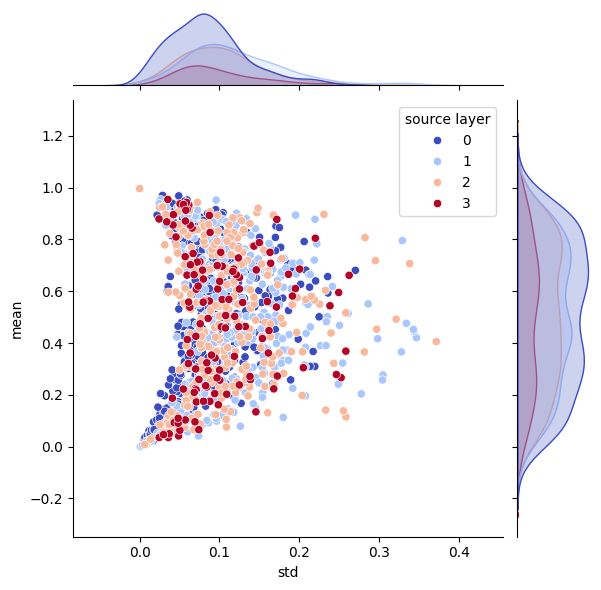

In [26]:
import seaborn as sns

sns.jointplot(plot_df, y="mean", x="std", hue="source layer", palette="coolwarm")